In [194]:
import control as ct 
import matplotlib.pyplot as plt 
import numpy as np 

In [195]:
# Parâmetros do sistema
num_sis = [0.007848]
den_sis = [1, 0.040221, 0.000385]
    
# Criando o sistema de controle com a função de transferência
sys = ct.tf(num_sis, den_sis)

# Definindo a amplitude do degrau
A = 0.25

# Função de transferência do compensador
num_comp = [1,0.000314]
den_comp = [1, 0.000065]
sys_comp = ct.tf(num_comp, den_comp)


# Definindo o atuador e o sensor
atuador = ct.tf([1], [1])
sensor = ct.tf([1], [1])


In [196]:
# Sistema não compensado
sys_ncomp = ct.feedback(sys*atuador, sensor)

# Sistema compensado
sys_compensado = ct.feedback(sys * sys_comp * atuador, sensor)

# Simulação da resposta ao degrau com amplitude A
#T = np.linspace(0, 1000)
T = np.linspace(0, 80000)
t_nc, y_nc = ct.step_response(sys_ncomp * A, T=T)
t_c, y_c = ct.step_response(sys_compensado * A, T=T)

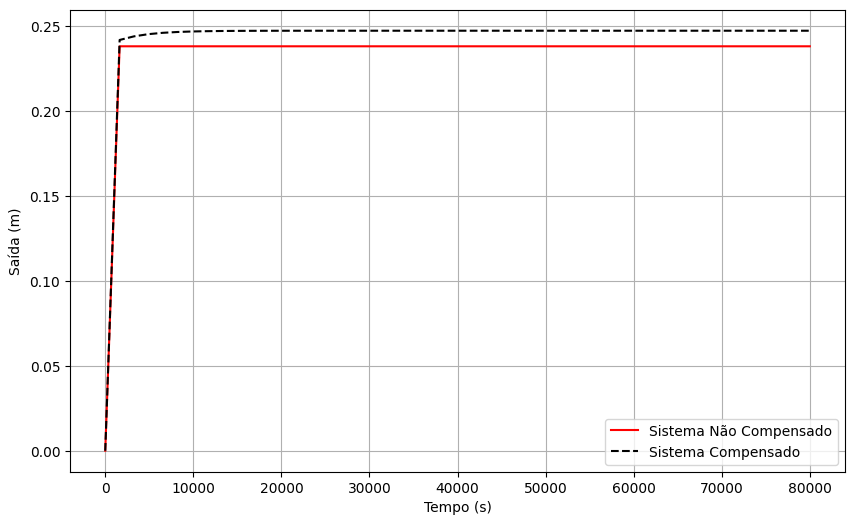

In [197]:
# Plotando as respostas ao degrau com amplitude A
plt.figure(figsize=(10, 6))
plt.plot(t_nc, y_nc, label='Sistema Não Compensado', color='red')
plt.plot(t_c, y_c, label='Sistema Compensado',  color='black', linestyle='--')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída (m)' )
plt.legend()
plt.grid()
plt.show()  

In [204]:
# Agora comparando oa erros do sistema não compensado e compensado 
erro_ss_nao_compensado = A - y_nc[-1]
erro_ss_compensado = A - y_c[-1]

print(f"Erro em Regime Estacionário (Não Compensado): {erro_ss_nao_compensado/A:.2%}")
print(f"Erro em Regime Estacionário (Compensado): {erro_ss_compensado/A:.2%}")

Erro em Regime Estacionário (Não Compensado): 4.68%
Erro em Regime Estacionário (Compensado): 1.01%
